In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [ ]:

# Path to the zip file on Google Drive
zip_path = '/content/drive/MyDrive/Finnifty.zip'  # Replace with your actual file path

# Destination folder for extracted contents
extract_folder = '/content/extracted '
os.makedirs(extract_folder, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Files extracted to {extract_folder}")


Files extracted to /content/extracted 


In [ ]:
import pandas as pd
import glob
import os

# Define the folder where CSV files are located
csv_folder_path = '/content/extracted /Finnifty'  # Replace with the path to your folder

# Use glob to get a list of all CSV files in the folder
all_csv_files = glob.glob(os.path.join(csv_folder_path, '*.csv'))

# Read and concatenate all CSV files into one DataFrame
df_list = [pd.read_csv(csv_file) for csv_file in all_csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_csv_path = '/content/combined.csv'
combined_df.to_csv(combined_csv_path, index=False)

print(f"Combined CSV saved at {combined_csv_path}")


Combined CSV saved at /content/combined.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/combined.csv',low_memory=False)
df.head()

,ticker,datetime,date,time,open,high,low,close,volume,open_interest,...,instrument_name,expiry_type,Time_to_expiry,spot_price,iv,delta,gamma,vega,theta,rho
0,FINNIFTY26DEC2322600CE,2023-12-05 09:54:59,2023-12-05,09:54:59,15.0,15.0,15.00,15.0,40,0,...,FINNIFTY,NaN,21.0,21009.45,0.168976,0.037575,0.000096,4.126896,-1.661417,0.446931
1,FINNIFTY26DEC2322600CE,2023-12-08 09:21:59,2023-12-08,09:21:59,7.45,7.45,7.45,7.45,40,40,...,FINNIFTY,NaN,18.0,21047.95,0.158639,0.022683,0.000073,2.517357,-1.109954,0.232391
2,FINNIFTY26DEC2322600CE,2023-12-08 09:27:59,2023-12-08,09:27:59,7.45,7.45,6.00,6.0,40,40,...,FINNIFTY,NaN,18.0,21070.80,0.151211,0.019277,0.000066,2.195810,-0.922857,0.197874
3,FINNIFTY26DEC2322600CE,2023-12-11 09:41:59,2023-12-11,09:41:59,11.0,11.0,8.40,8.4,80,80,...,FINNIFTY,NaN,15.0,21236.05,0.158741,0.027575,0.000093,2.730978,-1.445849,0.237722
4,FINNIFTY26DEC2322600CE,2023-12-15 11:52:59,2023-12-15,11:52:59,10.3,10.3,10.30,10.3,80,80,...,FINNIFTY,NaN,11.0,21397.90,0.173432,0.035944,0.000123,2.933678,-2.313743,0.229050


In [ ]:
df.shape

(12099669, 23)

In [ ]:
# prompt: convert df's datetime column to datetime type and sort it in ascending order

# Convert the 'Date' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort the DataFrame by the 'Date' column in ascending order
df.sort_values('datetime', ascending=True, inplace=True)

In [ ]:
df.head()

,ticker,datetime,date,time,open,high,low,close,volume,open_interest,...,instrument_name,expiry_type,Time_to_expiry,spot_price,iv,delta,gamma,vega,theta,rho
9559458,FINNIFTY14JAN2114500PE,2021-01-11 09:15:59,2021-01-11,09:15:59,15.0,15.0,15.00,15.0,40,0,...,FINNIFTY,NaN,3.0,15540.7,0.479358,-0.052964,0.000160,1.521195,-12.152125,-0.068913
9646076,FINNIFTY28JAN2115800CE,2021-01-11 09:15:59,2021-01-11,09:15:59,380.0,380.0,380.00,380.0,40,0,...,FINNIFTY,NaN,17.0,15540.7,0.358617,0.430614,0.000327,13.177194,-13.907390,2.946741
10334365,FINNIFTY14JAN2115700CE,2021-01-11 09:15:59,2021-01-11,09:15:59,249.75,249.75,225.00,230.0,160,0,...,FINNIFTY,NaN,3.0,15540.7,0.531629,0.425669,0.000523,5.522910,-48.944416,0.525025
10260242,FINNIFTY14JAN2115400PE,2021-01-11 09:15:59,2021-01-11,09:15:59,116.2,157.55,116.20,157.55,120,0,...,FINNIFTY,NaN,3.0,15540.7,0.399383,-0.393810,0.000684,5.420444,-36.071944,-0.516179
937073,FINNIFTY14JAN2115600CE,2021-01-11 09:15:59,2021-01-11,09:15:59,314.5,314.5,311.15,311.15,200,0,...,FINNIFTY,NaN,3.0,15540.7,0.598503,0.482857,0.000473,5.615567,-56.025403,0.591429


In [ ]:
# prompt: save the above 5 rows in  df.head into a csv named top

df.head().to_csv('top.csv', index=False)

In [ ]:
import pandas as pd

# Read the data into a pandas DataFrame
df = pd.read_csv('/content/combined.csv', low_memory=False)

# Convert 'datetime' to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Ensure 'iv' column is numeric
df['iv'] = pd.to_numeric(df['iv'], errors='coerce')

# Create 'date' column if not already present
df['date'] = df['datetime'].dt.date

# Calculate mean 'iv' per date
daily_iv = df.groupby('date')['iv'].mean().reset_index()

# Calculate overall mean and standard deviation of 'iv'
mean_iv = daily_iv['iv'].mean()
std_iv = daily_iv['iv'].std()

# Set the threshold at 1.5 standard deviations above the mean
threshold = mean_iv + 1.5 * std_iv

# Identify dates where mean 'iv' exceeds the threshold
high_vol_dates = daily_iv[daily_iv['iv'] > threshold]['date']

# Filter the original DataFrame for these dates
filtered_df = df[df['date'].isin(high_vol_dates)]

# Save the filtered data to a new CSV file
filtered_df.to_csv('high_volatility_periods.csv', index=False)

print("Filtered data has been saved to 'high_volatility_periods.csv'.")


Filtered data has been saved to 'high_volatility_periods.csv'.


In [ ]:
df = pd.read_csv('/content/high_volatility_periods.csv',low_memory=False)
df.head()

,ticker,datetime,date,time,open,high,low,close,volume,open_interest,...,instrument_name,expiry_type,Time_to_expiry,spot_price,iv,delta,gamma,vega,theta,rho
0,FINNIFTY28MAR2321500CE,2023-01-30 10:48:59,2023-01-30,10:48:59,39.70,39.70,39.70,39.70,40,0,...,FINNIFTY,NaN,57.0,17958.15,0.260991,0.045227,0.000051,6.754008,-1.547326,1.216541
1,FINNIFTY07FEB2317500PE,2023-01-30 09:40:59,2023-01-30,09:40:59,104.05,104.05,104.05,104.05,40,0,...,FINNIFTY,NaN,8.0,18057.80,0.296434,-0.230514,0.000384,8.127860,-15.052720,-0.936150
2,FINNIFTY07FEB2317500PE,2023-01-30 10:09:59,2023-01-30,10:09:59,59.30,59.30,59.30,59.30,40,40,...,FINNIFTY,NaN,8.0,18045.00,0.233130,-0.182433,0.000425,7.069211,-10.295670,-0.735311
3,FINNIFTY07FEB2317500PE,2023-01-30 11:43:59,2023-01-30,11:43:59,105.00,109.95,105.00,109.95,80,0,...,FINNIFTY,NaN,8.0,17944.80,0.271106,-0.259238,0.000450,8.604253,-14.572624,-1.044823
4,FINNIFTY07FEB2317500PE,2023-01-30 11:45:59,2023-01-30,11:45:59,109.95,109.95,109.90,109.90,40,80,...,FINNIFTY,NaN,8.0,17966.25,0.277373,-0.254269,0.000435,8.528182,-14.777898,-1.026445


In [ ]:
df.shape


(377991, 23)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from scipy.stats import norm


In [ ]:
# Load the high volatility data
df = pd.read_csv('/content/high_volatility_periods.csv')

# Convert 'datetime' to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Ensure 'iv' and other Greeks are numeric
numeric_cols = ['iv', 'delta', 'gamma', 'vega', 'theta', 'rho', 'spot_price', 'strike_price', 'close']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in key columns
df.dropna(subset=numeric_cols, inplace=True)

# Sort data by datetime
df.sort_values(by='datetime', inplace=True)


In [ ]:
# Function to find ATM options
def get_atm_options(data, date_time):
    # Make a copy of the subset to avoid the warning
    subset = data[data['datetime'] == date_time].copy()
    spot = subset['spot_price'].iloc[0]
    # Find the closest strike price to the spot price
    subset['strike_diff'] = np.abs(subset['strike_price'] - spot)
    # Get the ATM strike price
    atm_strike = subset.loc[subset['strike_diff'].idxmin(), 'strike_price']
    # Get the call and put options with the ATM strike
    call_option = subset[(subset['strike_price'] == atm_strike) & (subset['instrument_type'] == 'CE')]
    put_option = subset[(subset['strike_price'] == atm_strike) & (subset['instrument_type'] == 'PE')]
    return call_option, put_option



# Initialize lists to store results
dates = []
portfolio_values = []
cash_flows = []

# Initial capital
initial_capital = 100000  # Adjust as needed
portfolio_value = initial_capital

# Track positions
positions = []
cash = initial_capital

# Iterate over each unique datetime
for date_time in df['datetime'].unique():
    call_option, put_option = get_atm_options(df, date_time)
    if not call_option.empty and not put_option.empty:
        # Entry: Buy one call and one put
        call_price = call_option['close'].iloc[0]
        put_price = put_option['close'].iloc[0]
        total_cost = call_price + put_price

        # Update positions and cash
        positions.append({
            'datetime': date_time,
            'call_price': call_price,
            'put_price': put_price,
            'call_delta': call_option['delta'].iloc[0],
            'put_delta': put_option['delta'].iloc[0],
            'strike_price': call_option['strike_price'].iloc[0],
            'expiry_date': call_option['expiry_date'].iloc[0]
        })
        cash -= total_cost

        # Record the portfolio value
        portfolio_value = cash  # Initially, portfolio value is just the cash remaining
        portfolio_values.append(portfolio_value)
        dates.append(date_time)
    else:
        # No ATM options available at this datetime
        continue

# Convert to DataFrame
portfolio_df = pd.DataFrame({
    'datetime': dates,
    'portfolio_value': portfolio_values
})


In [ ]:
# Simulate the P&L over the period
from collections import deque

# Initialize variables
positions = deque()
portfolio_values = []
dates = []
cash = initial_capital

# For dynamic hedging, we need to track the delta exposure and adjust it
for current_time in pd.date_range(df['datetime'].min(), df['datetime'].max(), freq='D'):
    # Get the data for the current time
    current_data = df[df['datetime'] == current_time]
    if current_data.empty:
        continue

    # If entering a new position
    if not positions:
        call_option, put_option = get_atm_options(df, current_time)
        if not call_option.empty and not put_option.empty:
            # Buy one call and one put
            call_price = call_option['close'].iloc[0]
            put_price = put_option['close'].iloc[0]
            total_cost = call_price + put_price
            cash -= total_cost

            # Store the positions
            positions.append({
                'call_option': call_option,
                'put_option': put_option,
                'call_price': call_price,
                'put_price': put_price,
                'call_delta': call_option['delta'].iloc[0],
                'put_delta': put_option['delta'].iloc[0],
                'strike_price': call_option['strike_price'].iloc[0],
                'expiry_date': pd.to_datetime(call_option['expiry_date'].iloc[0]),
                'entry_time': current_time
            })
    else:
        # Update the value of the options
        new_positions = deque()
        for pos in positions:
            # Check if options have expired
            if current_time >= pos['expiry_date']:
                # Close the position at expiration
                # Option value at expiration is intrinsic value
                spot_price = current_data['spot_price'].iloc[0]
                call_intrinsic = max(0, spot_price - pos['strike_price'])
                put_intrinsic = max(0, pos['strike_price'] - spot_price)
                cash += call_intrinsic + put_intrinsic
            else:
                # Update option prices (assuming we have data)
                call_option = df[(df['datetime'] == current_time) &
                                 (df['strike_price'] == pos['strike_price']) &
                                 (df['instrument_type'] == 'CE')]
                put_option = df[(df['datetime'] == current_time) &
                                (df['strike_price'] == pos['strike_price']) &
                                (df['instrument_type'] == 'PE')]
                if not call_option.empty and not put_option.empty:
                    call_price = call_option['close'].iloc[0]
                    put_price = put_option['close'].iloc[0]
                    pos['call_price'] = call_price
                    pos['put_price'] = put_price
                    pos['call_delta'] = call_option['delta'].iloc[0]
                    pos['put_delta'] = put_option['delta'].iloc[0]
                    new_positions.append(pos)
                else:
                    # If no price data, assume last price
                    new_positions.append(pos)
        positions = new_positions

    # Calculate portfolio value
    portfolio_value = cash
    for pos in positions:
        portfolio_value += pos['call_price'] + pos['put_price']

    portfolio_values.append(portfolio_value)
    dates.append(current_time)

# Create portfolio DataFrame
portfolio_df = pd.DataFrame({
    'datetime': dates,
    'portfolio_value': portfolio_values
})

# Calculate returns
portfolio_df['returns'] = portfolio_df['portfolio_value'].pct_change().fillna(0)


performance metrices

In [ ]:
# Assuming 'dates' is a list of datetime objects and 'portfolio_values' is a list of portfolio values

# Create the portfolio DataFrame and set 'datetime' as index
portfolio_df = pd.DataFrame({
    'datetime': dates,
    'portfolio_value': portfolio_values
})
portfolio_df.set_index('datetime', inplace=True)

# Ensure the index is of datetime type
portfolio_df.index = pd.to_datetime(portfolio_df.index)

# Calculate returns
portfolio_df['returns'] = portfolio_df['portfolio_value'].pct_change().fillna(0)

# Extract the returns and portfolio values series
returns = portfolio_df['returns']
portfolio_values_series = portfolio_df['portfolio_value']

# Performance Metrics Functions

# Sharpe Ratio
def sharpe_ratio(returns, risk_free_rate=0.0):
    excess_returns = returns - risk_free_rate / 252
    return np.sqrt(252) * excess_returns.mean() / returns.std()

# Sortino Ratio
def sortino_ratio(returns, risk_free_rate=0.0):
    downside_std = returns[returns < 0].std()
    excess_returns = returns - risk_free_rate / 252
    return np.sqrt(252) * excess_returns.mean() / downside_std

# Max Drawdown
def max_drawdown(portfolio_values):
    cumulative = portfolio_values.cummax()
    drawdown = (portfolio_values - cumulative) / cumulative
    return drawdown.min()

# Annualized Return
def annualized_return(portfolio_values):
    total_return = portfolio_values.iloc[-1] / portfolio_values.iloc[0] - 1
    time_delta = portfolio_values.index[-1] - portfolio_values.index[0]
    num_years = time_delta.days / 365.25
    return (1 + total_return) ** (1 / num_years) - 1

# Calculate metrics
sr = sharpe_ratio(returns)
sor = sortino_ratio(returns)
mdd = max_drawdown(portfolio_values_series)
ar = annualized_return(portfolio_values_series)

print(f"Sharpe Ratio: {sr:.2f}")
print(f"Sortino Ratio: {sor:.2f}")
print(f"Max Drawdown: {mdd:.2%}")
print(f"Annualized Return: {ar:.2%}")


Sharpe Ratio: 3.33
Sortino Ratio: 6.96
Max Drawdown: -0.62%
Annualized Return: 1.12%


VISUAL AIDS FOR HIGH MARKET VOLATILITY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


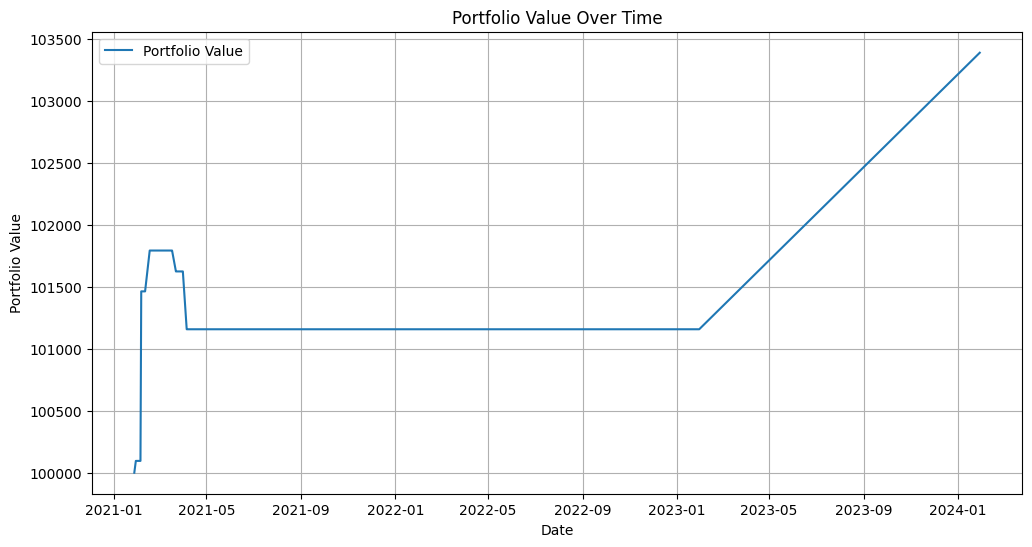

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_df.index, portfolio_df['portfolio_value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from collections import deque

# Initial capital
initial_capital = 100000  # Adjust as needed
cash = initial_capital

# Lists to store portfolio values and dates
portfolio_values = []
dates = []

# Initialize positions and hedge position
positions = deque()
hedge_position = 0  # Units of the underlying asset

# Transaction cost parameters
delta_threshold = 0.1  # Threshold for rebalancing
transaction_cost = 0.001  # Transaction cost per unit

# Lists to store trade details
trade_entries = []
trade_exits = []
trade_profits = []
trade_dates = []

# Define the function to get ATM options
def get_atm_options(data, current_date):
    # Create a copy to avoid SettingWithCopyWarning
    subset = data[data['date'] == current_date.date()].copy()
    if subset.empty:
        return None, None
    spot = subset['spot_price'].iloc[0]
    # Find the closest strike price to the spot price
    subset['strike_diff'] = np.abs(subset['strike_price'] - spot)
    # Identify the ATM strike price
    atm_strike = subset.loc[subset['strike_diff'].idxmin(), 'strike_price']
    # Get the ATM call and put options
    call_option = subset[(subset['strike_price'] == atm_strike) & (subset['instrument_type'] == 'CE')]
    put_option = subset[(subset['strike_price'] == atm_strike) & (subset['instrument_type'] == 'PE')]
    if call_option.empty or put_option.empty:
        return None, None
    return call_option.iloc[0], put_option.iloc[0]

# Prepare the DataFrame
df['date'] = pd.to_datetime(df['date']).dt.date
df.sort_values(by='date', inplace=True)

# Get the list of unique dates in the dataset
unique_dates = pd.to_datetime(df['date'].unique())
unique_dates = unique_dates.sort_values()

# Iterate over each unique date
for current_date in unique_dates:
    current_data = df[df['date'] == current_date.date()]
    if current_data.empty:
        continue

    # Entry: If no open positions, enter a new straddle
    if not positions:
        call_option, put_option = get_atm_options(df, current_date)
        if call_option is not None and put_option is not None:
            # Buy one call and one put
            call_price = call_option['close']
            put_price = put_option['close']
            total_cost = call_price + put_price + 2 * (call_price + put_price) * transaction_cost  # Include transaction costs
            cash -= total_cost

            # Store the position
            positions.append({
                'call_option': call_option,
                'put_option': put_option,
                'call_price': call_price,
                'put_price': put_price,
                'strike_price': call_option['strike_price'],
                'expiry_date': pd.to_datetime(call_option['expiry_date']).date(),
                'entry_date': current_date.date(),
                'call_contracts': 1,
                'put_contracts': 1
            })

            # Record trade entry
            trade_entries.append(current_date.date())
            trade_dates.append(current_date.date())
    else:
        # Update positions
        new_positions = deque()
        for pos in positions:
            # Check if options have expired
            if current_date.date() >= pos['expiry_date']:
                # Close the position at expiration
                spot_price = current_data['spot_price'].iloc[0]
                call_intrinsic = max(0, spot_price - pos['strike_price'])
                put_intrinsic = max(0, pos['strike_price'] - spot_price)
                total_value = call_intrinsic + put_intrinsic
                cash += total_value - 2 * total_value * transaction_cost  # Include transaction costs

                # Calculate trade profit
                total_entry_cost = pos['call_price'] + pos['put_price'] + 2 * (pos['call_price'] + pos['put_price']) * transaction_cost
                trade_profit = total_value - total_entry_cost
                trade_profits.append(trade_profit)

                # Record trade exit
                trade_exits.append(current_date.date())
            else:
                # Update option prices
                call_option = df[(df['date'] == current_date.date()) &
                                 (df['strike_price'] == pos['strike_price']) &
                                 (df['instrument_type'] == 'CE')]
                put_option = df[(df['date'] == current_date.date()) &
                                 (df['strike_price'] == pos['strike_price']) &
                                 (df['instrument_type'] == 'PE')]
                if not call_option.empty and not put_option.empty:
                    pos['call_price'] = call_option['close'].iloc[0]
                    pos['put_price'] = put_option['close'].iloc[0]
                    new_positions.append(pos)
                else:
                    # If no price data, assume last price
                    new_positions.append(pos)
        positions = new_positions

    # Calculate portfolio value
    portfolio_value = cash
    for pos in positions:
        portfolio_value += pos['call_price'] * pos['call_contracts'] + pos['put_price'] * pos['put_contracts']
    portfolio_values.append(portfolio_value)
    dates.append(current_date.date())

# Define portfolio_df
portfolio_df = pd.DataFrame({
    'date': dates,
    'portfolio_value': portfolio_values
})

portfolio_df['date'] = pd.to_datetime(portfolio_df['date'])
portfolio_df.set_index('date', inplace=True)
portfolio_df['returns'] = portfolio_df['portfolio_value'].pct_change().fillna(0)

# Define trades_df
trades_df = pd.DataFrame({
    'entry_date': trade_entries,
    'exit_date': trade_exits,
    'profit': trade_profits
})

trades_df['entry_date'] = pd.to_datetime(trades_df['entry_date'])
trades_df['exit_date'] = pd.to_datetime(trades_df['exit_date'])

# Display the DataFrames
print("Portfolio DataFrame:")
print(portfolio_df.head())

print("\nTrades DataFrame:")
print(trades_df.head())


Portfolio DataFrame:
            portfolio_value   returns
date                                 
2021-01-27       99999.3955  0.000000
2021-01-29      100139.4591  0.001401
2021-02-01      100138.4798 -0.000010
2021-02-02      100464.6298  0.003257
2021-02-04      100607.6084  0.001423

Trades DataFrame:
  entry_date  exit_date    profit
0 2021-01-27 2021-01-29  140.3455
1 2021-02-01 2021-02-04  143.2684
2 2021-02-05 2021-02-16  347.6200
3 2021-02-24 2021-03-03 -251.9421
4 2021-03-05 2021-03-15   28.7030


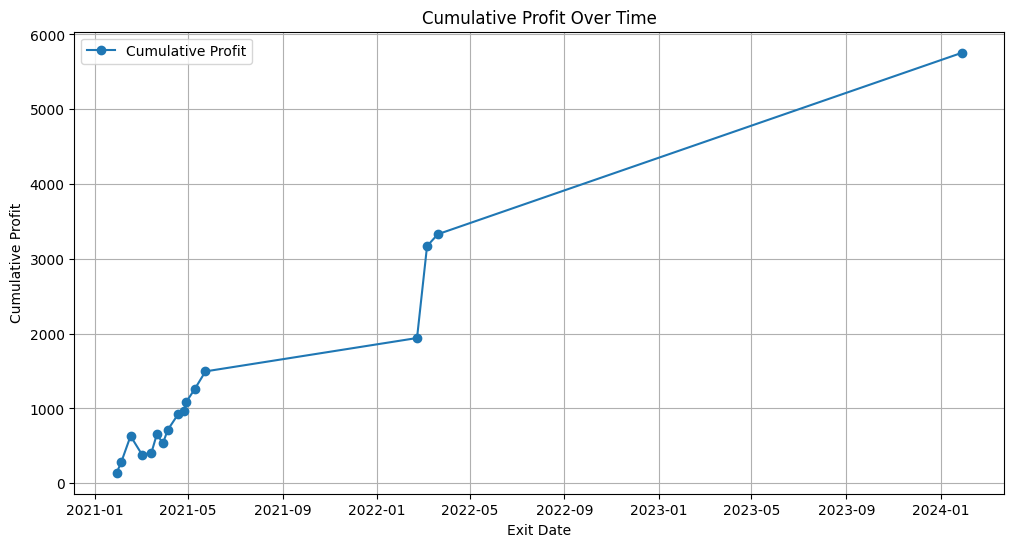

In [ ]:
# Ensure trades_df is sorted by exit_date
trades_df.sort_values('exit_date', inplace=True)

# Calculate cumulative profit
trades_df['cumulative_profit'] = trades_df['profit'].cumsum()

# Plot cumulative profit
plt.figure(figsize=(12, 6))
plt.plot(trades_df['exit_date'], trades_df['cumulative_profit'], marker='o', label='Cumulative Profit')
plt.title('Cumulative Profit Over Time')
plt.xlabel('Exit Date')
plt.ylabel('Cumulative Profit')
plt.legend()
plt.grid(True)
plt.show()


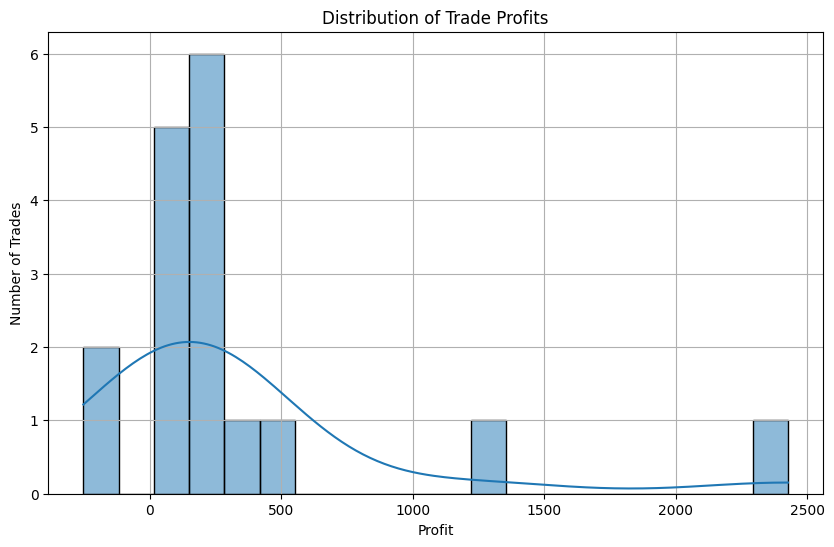

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(trades_df['profit'], bins=20, kde=True)
plt.title('Distribution of Trade Profits')
plt.xlabel('Profit')
plt.ylabel('Number of Trades')
plt.grid(True)
plt.show()


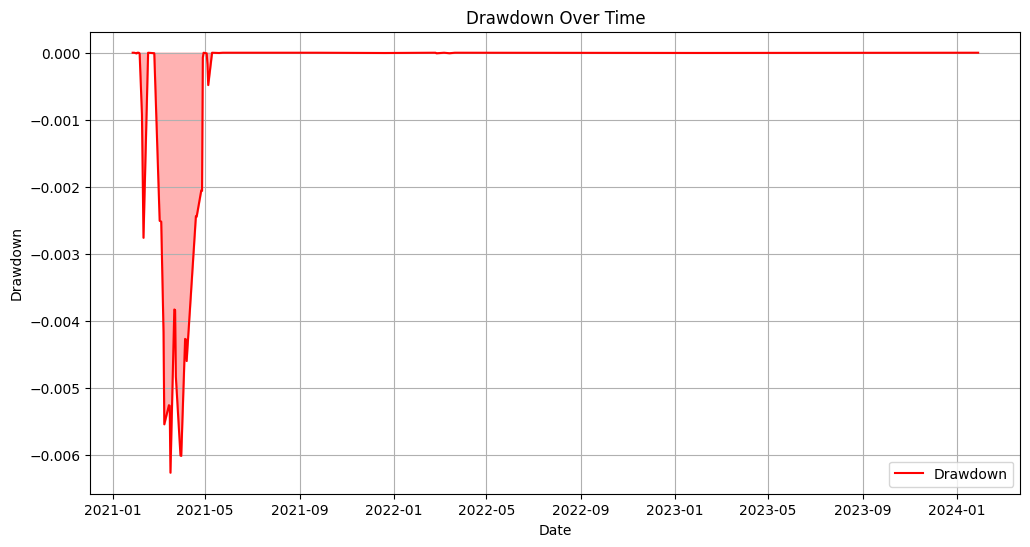

In [ ]:
# Calculate drawdowns
portfolio_df['cum_max'] = portfolio_df['portfolio_value'].cummax()
portfolio_df['drawdown'] = (portfolio_df['portfolio_value'] - portfolio_df['cum_max']) / portfolio_df['cum_max']

# Plot drawdowns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_df.index, portfolio_df['drawdown'], color='red', label='Drawdown')
plt.fill_between(portfolio_df.index, portfolio_df['drawdown'], color='red', alpha=0.3)
plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()


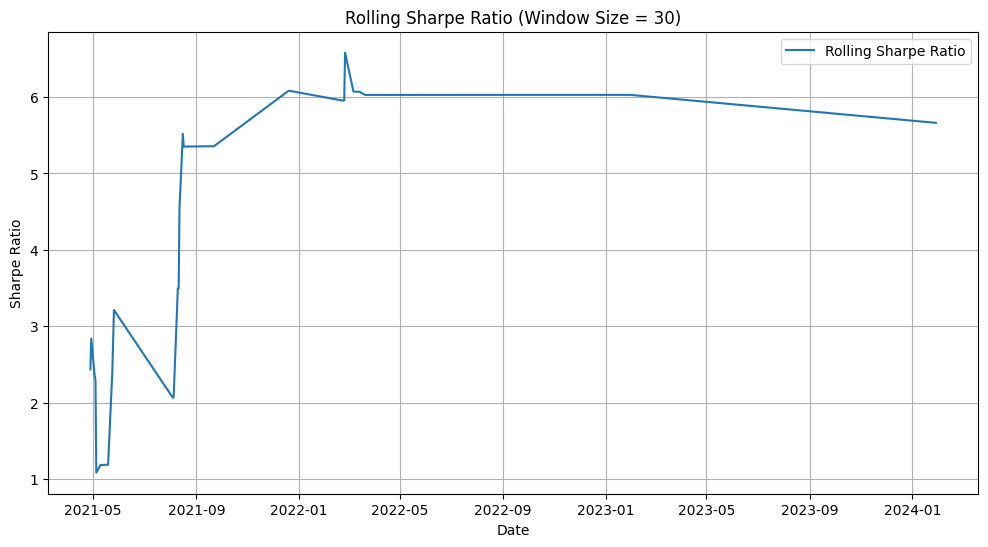

In [ ]:
# Define rolling window size (e.g., 30 periods)
window_size = 30

# Calculate rolling Sharpe Ratio
portfolio_df['rolling_sharpe'] = portfolio_df['returns'].rolling(window=window_size).apply(
    lambda x: (np.sqrt(252) * x.mean() / x.std()) if x.std() != 0 else np.nan
)

# Plot rolling Sharpe Ratio
plt.figure(figsize=(12, 6))
plt.plot(portfolio_df.index, portfolio_df['rolling_sharpe'], label='Rolling Sharpe Ratio')
plt.title(f'Rolling Sharpe Ratio (Window Size = {window_size})')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid(True)
plt.show()


Task 1 ) b  Bullish Market with Low Volatility

In [ ]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv('/content/combined.csv', low_memory=False)

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert 'date' to datetime, coercing errors to NaT
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where 'date' is NaT
df.dropna(subset=['date'], inplace=True)

# Ensure 'datetime' is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Drop rows where 'datetime' is NaT (if necessary)
df.dropna(subset=['datetime'], inplace=True)

# Ensure 'spot_price' and 'iv' are numeric
df['spot_price'] = pd.to_numeric(df['spot_price'], errors='coerce')
df['iv'] = pd.to_numeric(df['iv'], errors='coerce')

# Drop rows with missing values in key columns
df.dropna(subset=['spot_price', 'iv'], inplace=True)

# Sort data by date
df.sort_values(by='date', inplace=True)




In [ ]:
# Calculate daily closing prices of the underlying asset
# Assuming 'spot_price' represents the daily closing price

# Group by date and get the last spot price of each day
daily_prices = df.groupby('date')['spot_price'].last().reset_index()

# Calculate moving averages
daily_prices['SMA_Short'] = daily_prices['spot_price'].rolling(window=5).mean()
daily_prices['SMA_Long'] = daily_prices['spot_price'].rolling(window=20).mean()

# Identify bullish periods
daily_prices['Bullish'] = daily_prices['SMA_Short'] > daily_prices['SMA_Long']


In [ ]:
# Calculate the mean and standard deviation of 'iv'
iv_mean = df['iv'].mean()
iv_std = df['iv'].std()

# Set a liberal threshold for low volatility (e.g., iv below mean)
low_vol_threshold = iv_mean  # You can adjust this threshold if needed

# Identify low volatility dates
# First, calculate daily average 'iv'
daily_iv = df.groupby('date')['iv'].mean().reset_index()
daily_iv['Low_Volatility'] = daily_iv['iv'] < low_vol_threshold



In [ ]:
# Merge daily_prices and daily_iv on 'date'
merged_data = pd.merge(daily_prices, daily_iv[['date', 'Low_Volatility']], on='date', how='inner')

# Identify periods that are both bullish and low volatility
merged_data['Bullish_LowVol'] = merged_data['Bullish'] & merged_data['Low_Volatility']

# Filter for these periods
bullish_low_vol_periods = merged_data[merged_data['Bullish_LowVol']]


In [ ]:
# Adjust moving averages
daily_prices['SMA_Short'] = daily_prices['spot_price'].rolling(window=3).mean()
daily_prices['SMA_Long'] = daily_prices['spot_price'].rolling(window=10).mean()


In [ ]:
# Increase the threshold by adding a fraction of the standard deviation
low_vol_threshold = iv_mean + iv_std * 0.5  # Adjust the multiplier as needed
daily_iv['Low_Volatility'] = daily_iv['iv'] < low_vol_threshold


In [ ]:
# Recalculate Bullish after adjusting moving averages
daily_prices['Bullish'] = daily_prices['SMA_Short'] > daily_prices['SMA_Long']

# Recalculate Low Volatility after adjusting threshold
daily_iv['Low_Volatility'] = daily_iv['iv'] < low_vol_threshold

# Merge again
merged_data = pd.merge(daily_prices, daily_iv[['date', 'Low_Volatility']], on='date', how='inner')
merged_data['Bullish_LowVol'] = merged_data['Bullish'] & merged_data['Low_Volatility']

# Filter for periods that satisfy both conditions
bullish_low_vol_periods = merged_data[merged_data['Bullish_LowVol']]

# Check if we have any periods
if bullish_low_vol_periods.empty:
    print("No periods found with the current thresholds. Consider relaxing them further.")
else:
    print(f"Found {len(bullish_low_vol_periods)} periods with bullish trend and low volatility.")


Found 291 periods with bullish trend and low volatility.


In [ ]:
# Save the dates to a CSV file
bullish_low_vol_dates = bullish_low_vol_periods['date']
filtered_df = df[df['date'].isin(bullish_low_vol_dates)]
filtered_df.to_csv('bullish_low_volatility_periods.csv', index=False)

print("Filtered data has been saved to 'bullish_low_volatility_periods.csv'.")


Filtered data has been saved to 'bullish_low_volatility_periods.csv'.


In [ ]:
df = pd.read_csv('/content/bullish_low_volatility_periods.csv',low_memory=False)
df.head()

,ticker,datetime,date,time,open,high,low,close,volume,open_interest,...,instrument_name,expiry_type,Time_to_expiry,spot_price,iv,delta,gamma,vega,theta,rho
0,FINNIFTY25FEB2117600CE,2021-02-19 11:34:59,2021-02-19,11:34:59,30.50,30.50,30.50,30.50,40.0,3160.0,...,FINNIFTY,NaN,6.0,16917.55,0.250004,0.111706,0.000351,4.123776,-8.593897,0.305891
1,FINNIFTY25FEB2117600CE,2021-02-19 11:48:59,2021-02-19,11:48:59,26.65,27.90,26.65,27.90,720.0,3520.0,...,FINNIFTY,NaN,6.0,16923.95,0.242045,0.106310,0.000349,3.981114,-8.032496,0.291414
2,FINNIFTY25FEB2117600CE,2021-02-19 11:47:59,2021-02-19,11:47:59,26.55,26.65,26.55,26.65,160.0,3480.0,...,FINNIFTY,NaN,6.0,16914.35,0.241549,0.102518,0.000341,3.875482,-7.803325,0.280897
3,FINNIFTY25FEB2117600CE,2021-02-19 11:46:59,2021-02-19,11:46:59,27.15,27.15,26.35,26.55,1360.0,3480.0,...,FINNIFTY,NaN,6.0,16914.45,0.241272,0.102286,0.000341,3.869134,-7.781623,0.280271
4,FINNIFTY25FEB2117600CE,2021-02-19 11:45:59,2021-02-19,11:45:59,26.95,27.65,26.85,27.00,880.0,3480.0,...,FINNIFTY,NaN,6.0,16923.70,0.239908,0.104151,0.000347,3.922377,-7.844124,0.285545


In [ ]:
df.shape

(5831699, 23)

Covered call for period 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta


In [ ]:
# Load the data
df = pd.read_csv('/content/bullish_low_volatility_periods.csv', low_memory = False )

# Convert 'datetime' and 'date' columns to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = pd.to_datetime(df['date'])

# Ensure numeric columns are correctly formatted
numeric_cols = ['spot_price', 'strike_price', 'close', 'iv', 'delta', 'gamma', 'vega', 'theta', 'rho']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in key columns
df.dropna(subset=numeric_cols, inplace=True)

# Sort the DataFrame
df.sort_values(by=['date', 'datetime'], inplace=True)


In [ ]:
# Parameters
initial_capital = 100000
position_size = initial_capital * 0.05  # 5% of initial capital
transaction_cost = 0.001  # Transaction cost per unit
delta_threshold = 0.1  # Threshold for re-hedging
contracts_per_trade = 1  # Number of option contracts per trade
shares_per_contract = 100  # Number of shares per option contract

# Initialize variables
cash = initial_capital
portfolio_value = initial_capital
portfolio_values = []
dates = []
hedge_positions = []
positions = []


In [ ]:
# Group data by date
grouped = df.groupby('date')

# Initialize position flag
have_position = False

for date, group in grouped:
    # Get spot price
    spot_price = group['spot_price'].iloc[0]

    # Ensure we have valid spot price
    if pd.isna(spot_price):
        continue

    # Select call options
    call_options = group[group['instrument_type'] == 'CE'].copy()
    call_options['moneyness'] = call_options['strike_price'] - spot_price

    # Ensure call options are available
    if call_options.empty:
        continue

    # Select long call (ATM or ITM)
    long_call_options = call_options[call_options['moneyness'] <= 0]
    if long_call_options.empty:
        continue
    long_call_option = long_call_options.loc[long_call_options['moneyness'].idxmax()]

    # Select short call (OTM)
    short_call_options = call_options[call_options['moneyness'] > 0]
    if short_call_options.empty:
        continue
    short_call_option = short_call_options.loc[short_call_options['moneyness'].idxmin()]

    # Check if we already have a position
    if not have_position:
        # Buy the long call
        long_call_cost = contracts_per_trade * long_call_option['close'] * shares_per_contract * (1 + transaction_cost)
        cash -= long_call_cost

        # Sell the short call
        short_call_premium = contracts_per_trade * short_call_option['close'] * shares_per_contract * (1 - transaction_cost)
        cash += short_call_premium

        # Net premium paid
        net_premium = long_call_cost - short_call_premium

        # Initialize hedge position
        net_delta = (contracts_per_trade * long_call_option['delta'] - contracts_per_trade * short_call_option['delta']) * shares_per_contract
        hedge_units = -net_delta
        hedge_cost = hedge_units * spot_price * (1 + transaction_cost)
        cash -= hedge_cost

        # Store position
        position = {
            'date': date,
            'long_call': long_call_option,
            'short_call': short_call_option,
            'contracts': contracts_per_trade,
            'net_premium': net_premium,
            'hedge_units': hedge_units,
            'hedge_cost': hedge_cost,
            'entry_spot_price': spot_price,
        }
        have_position = True
    else:
        # Update positions and perform dynamic hedging
        # Update option prices
        long_call_data = group[(group['instrument_type'] == 'CE') & (group['strike_price'] == position['long_call']['strike_price'])]
        short_call_data = group[(group['instrument_type'] == 'CE') & (group['strike_price'] == position['short_call']['strike_price'])]

        if not long_call_data.empty and not short_call_data.empty:
            long_call_price = long_call_data['close'].iloc[0]
            long_call_delta = long_call_data['delta'].iloc[0]
            short_call_price = short_call_data['close'].iloc[0]
            short_call_delta = short_call_data['delta'].iloc[0]
        else:
            # Use previous prices and deltas if data not available
            long_call_price = position['long_call']['close']
            long_call_delta = position['long_call']['delta']
            short_call_price = position['short_call']['close']
            short_call_delta = position['short_call']['delta']

        # Calculate net delta
        net_delta = (contracts_per_trade * long_call_delta - contracts_per_trade * short_call_delta) * shares_per_contract + position['hedge_units']

        # Re-hedge if delta changes significantly
        if abs(net_delta) > delta_threshold:
            delta_adjustment = -net_delta
            hedge_units = position['hedge_units'] + delta_adjustment
            hedge_cost = delta_adjustment * spot_price * (1 + transaction_cost)
            cash -= hedge_cost
            position['hedge_units'] = hedge_units

        # Calculate portfolio value
        long_call_value = contracts_per_trade * long_call_price * shares_per_contract
        short_call_value = contracts_per_trade * short_call_price * shares_per_contract * -1  # Short position
        hedge_value = position['hedge_units'] * spot_price
        portfolio_value = cash + long_call_value + short_call_value + hedge_value

        # Record portfolio values
        portfolio_values.append(portfolio_value)
        dates.append(date)
        hedge_positions.append(position['hedge_units'])


# Check exit criteria
spread_value = long_call_value + short_call_value
profit_loss = spread_value - position['net_premium']
expiry_date = pd.to_datetime(position['long_call']['expiry_date'])

if (profit_loss >= position['net_premium'] * 0.5 or  # Profit target reached
    profit_loss <= -position['net_premium'] * 0.5 or  # Stop loss triggered
    date >= expiry_date):  # Option expired
    # Close positions
    cash += long_call_value - (long_call_value * transaction_cost)
    cash += short_call_value - (abs(short_call_value) * transaction_cost)
    cash += position['hedge_units'] * spot_price - abs(position['hedge_units'] * spot_price * transaction_cost)
    have_position = False
    position = None




In [ ]:
# Close any remaining positions
if have_position and position is not None:
    # Use the last available data
    spot_price = group['spot_price'].iloc[-1]
    long_call_price = position['long_call']['close']
    short_call_price = position['short_call']['close']
    long_call_value = contracts_per_trade * long_call_price * shares_per_contract
    short_call_value = contracts_per_trade * short_call_price * shares_per_contract * -1
    cash += long_call_value - (long_call_value * transaction_cost)
    cash += short_call_value - (abs(short_call_value) * transaction_cost)
    cash += position['hedge_units'] * spot_price - abs(position['hedge_units'] * spot_price * transaction_cost)
    portfolio_value = cash
    portfolio_values.append(portfolio_value)
    dates.append(date)
    hedge_positions.append(0)
    have_position = False
    position = None


In [ ]:
# Create portfolio DataFrame
portfolio_df = pd.DataFrame({
    'date': dates,
    'portfolio_value': portfolio_values,
    'hedge_units': hedge_positions
})

portfolio_df.set_index('date', inplace=True)
portfolio_df.index = pd.to_datetime(portfolio_df.index)
portfolio_df['returns'] = portfolio_df['portfolio_value'].pct_change().fillna(0)


In [ ]:
# Performance Metric Functions

# Sharpe Ratio
def sharpe_ratio(returns, risk_free_rate=0.0):
    excess_returns = returns - risk_free_rate / 252
    return np.sqrt(252) * excess_returns.mean() / returns.std()

# Sortino Ratio
def sortino_ratio(returns, risk_free_rate=0.0):
    negative_returns = returns[returns < 0]
    downside_std = negative_returns.std()
    excess_returns = returns - risk_free_rate / 252
    return np.sqrt(252) * excess_returns.mean() / downside_std

# Max Drawdown
def max_drawdown(portfolio_values):
    cumulative_max = portfolio_values.cummax()
    drawdowns = (portfolio_values - cumulative_max) / cumulative_max
    return drawdowns.min()

# Annualized Return
def annualized_return(portfolio_values):
    total_return = portfolio_values.iloc[-1] / portfolio_values.iloc[0] - 1
    time_delta = portfolio_values.index[-1] - portfolio_values.index[0]
    num_years = time_delta.days / 365.25
    return (1 + total_return) ** (1 / num_years) - 1

# Calculate metrics
returns = portfolio_df['returns']
portfolio_values_series = portfolio_df['portfolio_value']

if len(portfolio_values_series) > 1:
    sr = sharpe_ratio(returns)
    sor = sortino_ratio(returns)
    mdd = max_drawdown(portfolio_values_series)
    ar = annualized_return(portfolio_values_series)
else:
    sr = sor = mdd = ar = np.nan

print(f"Sharpe Ratio: {sr:.2f}")
print(f"Sortino Ratio: {sor:.2f}")
print(f"Max Drawdown: {mdd:.2%}")
print(f"Annualized Return: {ar:.2%}")


Sharpe Ratio: 0.74
Sortino Ratio: 3.36
Max Drawdown: -24.15%
Annualized Return: 16.38%


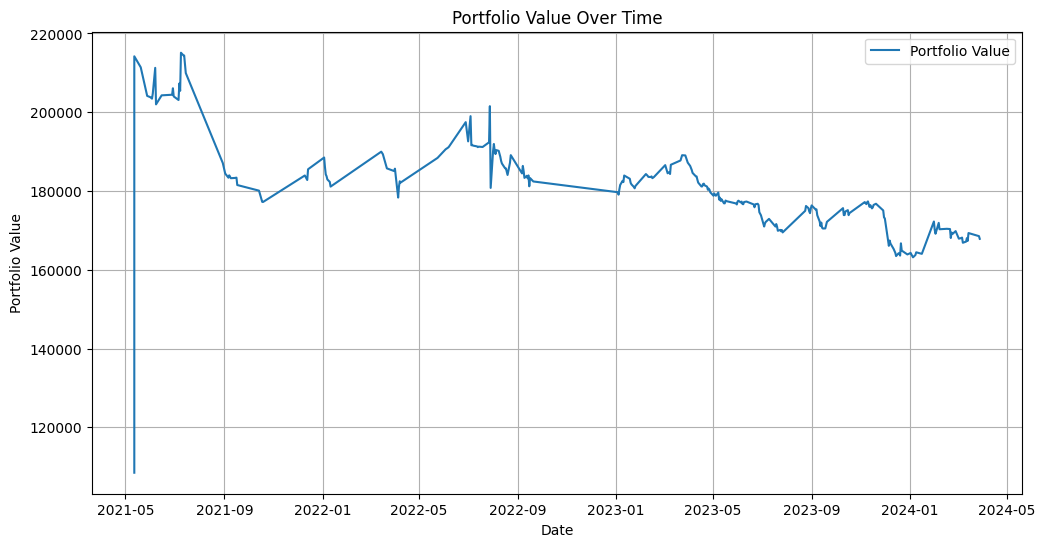

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_df.index, portfolio_df['portfolio_value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()


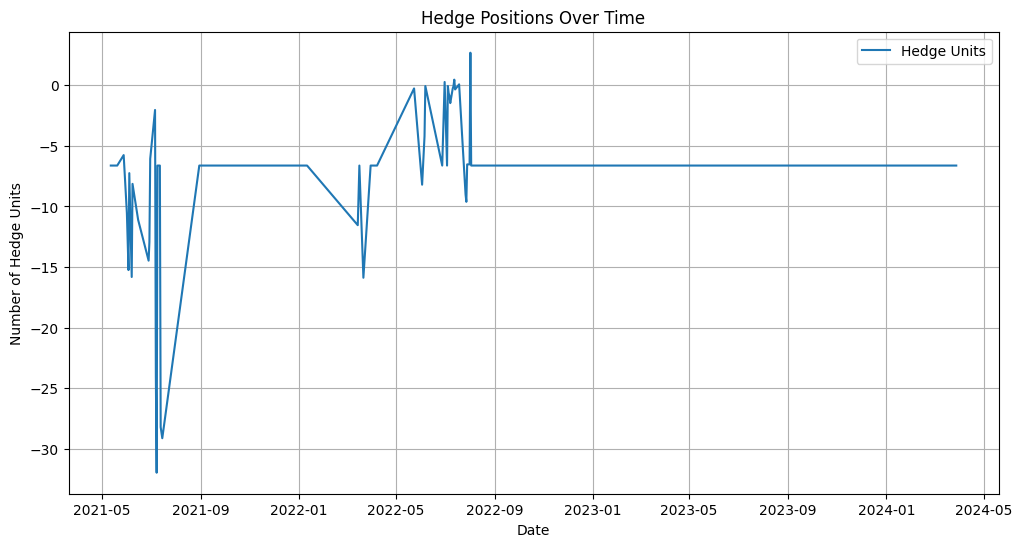

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_df.index, portfolio_df['hedge_units'], label='Hedge Units')
plt.title('Hedge Positions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Hedge Units')
plt.legend()
plt.grid(True)
plt.show()


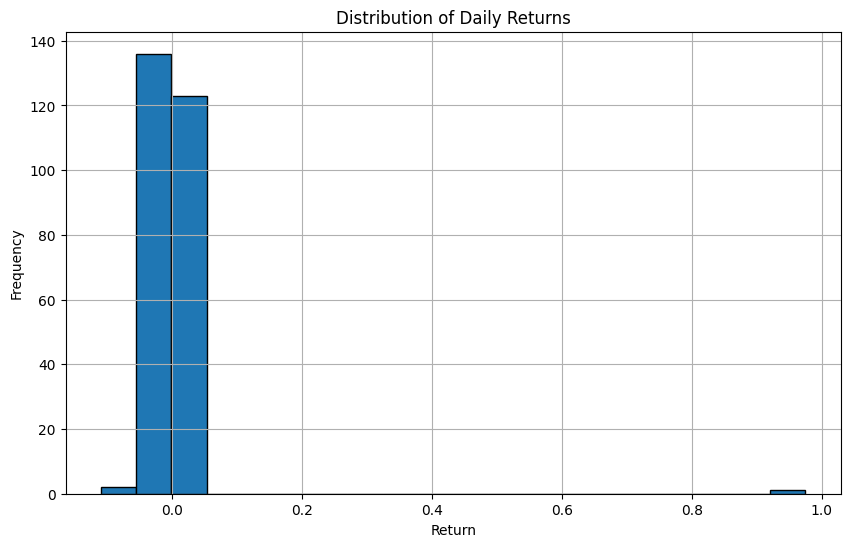

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(portfolio_df['returns'], bins=20, edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


BEARISH WITH HIGH IMPLIED VOLATILITY

In [ ]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv('/content/combined.csv', low_memory= False)

# Ensure datetime columns are in datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['datetime', 'date'], inplace=True)

# Ensure 'spot_price' and 'iv' are numeric
df['spot_price'] = pd.to_numeric(df['spot_price'], errors='coerce')
df['iv'] = pd.to_numeric(df['iv'], errors='coerce')

# Drop rows with missing values in key columns
df.dropna(subset=['spot_price', 'iv'], inplace=True)

# Sort data by date
df.sort_values(by='date', inplace=True)


In [ ]:
# Calculate daily closing prices of the underlying asset
daily_prices = df.groupby('date')['spot_price'].last().reset_index()

# Calculate moving averages
daily_prices['SMA_Short'] = daily_prices['spot_price'].rolling(window=5).mean()
daily_prices['SMA_Long'] = daily_prices['spot_price'].rolling(window=20).mean()

# Identify bearish periods
daily_prices['Bearish'] = daily_prices['SMA_Short'] < daily_prices['SMA_Long']


In [ ]:
# Calculate the mean and standard deviation of 'iv'
iv_mean = df['iv'].mean()
iv_std = df['iv'].std()

# Set the threshold for high volatility as 0.5 standard deviations above the mean
high_vol_threshold = iv_mean + 0.5 * iv_std

# Identify high volatility dates
# First, calculate daily average 'iv'
daily_iv = df.groupby('date')['iv'].mean().reset_index()
daily_iv['High_Volatility'] = daily_iv['iv'] > high_vol_threshold


In [ ]:
# Merge daily_prices and daily_iv on 'date'
merged_data = pd.merge(daily_prices, daily_iv[['date', 'High_Volatility']], on='date', how='inner')

# Identify periods that are both bearish and high volatility
merged_data['Bearish_HighVol'] = merged_data['Bearish'] & merged_data['High_Volatility']

# Filter for these periods
bearish_high_vol_periods = merged_data[merged_data['Bearish_HighVol']]


In [ ]:
# Recalculate Bearish after adjusting moving averages
daily_prices['Bearish'] = daily_prices['SMA_Short'] < daily_prices['SMA_Long']

# Recalculate High Volatility after adjusting threshold
daily_iv['High_Volatility'] = daily_iv['iv'] > high_vol_threshold

# Merge again
merged_data = pd.merge(daily_prices, daily_iv[['date', 'High_Volatility']], on='date', how='inner')
merged_data['Bearish_HighVol'] = merged_data['Bearish'] & merged_data['High_Volatility']

# Filter for periods that satisfy both conditions
bearish_high_vol_periods = merged_data[merged_data['Bearish_HighVol']]

# Check if we have any periods
if bearish_high_vol_periods.empty:
    print("No periods found with the current thresholds. Consider relaxing them further.")
else:
    print(f"Found {len(bearish_high_vol_periods)} periods with bearish trend and high volatility.")


Found 72 periods with bearish trend and high volatility.


In [ ]:
# Save the dates to a CSV file
bearish_high_vol_dates = bearish_high_vol_periods['date']
filtered_df = df[df['date'].isin(bearish_high_vol_dates)]
filtered_df.to_csv('bearish_high_volatility_periods.csv', index=False)

print("Filtered data has been saved to 'bearish_high_volatility_periods.csv'.")


Filtered data has been saved to 'bearish_high_volatility_periods.csv'.


In [ ]:
df = pd.read_csv('/content/bearish_high_volatility_periods.csv',low_memory=False)
df.head()

,ticker,datetime,date,time,open,high,low,close,volume,open_interest,...,instrument_name,expiry_type,Time_to_expiry,spot_price,iv,delta,gamma,vega,theta,rho
0,FINNIFTY18MAR2114500PE,2021-03-15 10:48:59,2021-03-15,10:48:59,9.0,9.00,8.9,8.95,120.0,6400.0,...,FINNIFTY,NaN,3.0,16191.20,0.632478,-0.025429,0.000064,0.870219,-9.172665,-0.034590
1,FINNIFTY18MAR2114500PE,2021-03-15 10:47:59,2021-03-15,10:47:59,9.0,9.00,9.0,9.00,160.0,6400.0,...,FINNIFTY,NaN,3.0,16181.55,0.630244,-0.025650,0.000065,0.876025,-9.201238,-0.034868
2,FINNIFTY18MAR2114500PE,2021-03-15 10:02:59,2021-03-15,10:02:59,8.9,8.90,8.3,8.30,120.0,5240.0,...,FINNIFTY,NaN,3.0,16238.55,0.638361,-0.023535,0.000059,0.817863,-8.700995,-0.032106
3,FINNIFTY18MAR2114500PE,2021-03-15 10:01:59,2021-03-15,10:01:59,8.3,8.90,8.3,8.90,160.0,4920.0,...,FINNIFTY,NaN,3.0,16231.25,0.643527,-0.024852,0.000061,0.855772,-9.177969,-0.033900
4,FINNIFTY18MAR2114500PE,2021-03-15 10:08:59,2021-03-15,10:08:59,8.5,9.95,8.5,9.95,120.0,5160.0,...,FINNIFTY,NaN,3.0,16186.75,0.642440,-0.027519,0.000067,0.929344,-9.950179,-0.037444


In [ ]:
df.shape

(710589, 23)

In [ ]:
# Load the data
df = pd.read_csv('/content/bearish_high_volatility_periods.csv', low_memory = False)

# Convert 'datetime' and 'date' columns to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['datetime', 'date'], inplace=True)

# Ensure numeric columns are correctly formatted
numeric_cols = ['spot_price', 'strike_price', 'close', 'iv', 'delta', 'gamma', 'vega', 'theta', 'rho']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in key columns
df.dropna(subset=numeric_cols, inplace=True)

# Sort the DataFrame
df.sort_values(by=['date', 'datetime'], inplace=True)


In [ ]:
# Parameters
initial_capital = 100000
position_size = initial_capital * 0.02  # 2% of initial capital
transaction_cost = 0.001  # Transaction cost per unit
delta_threshold = 0.1  # Threshold for re-hedging
contracts_per_trade = 1  # Number of option contracts per trade
shares_per_contract = 100  # Number of shares per option contract

# Initialize variables
cash = initial_capital
portfolio_value = initial_capital
portfolio_values = []
dates = []
hedge_positions = []
position = None  # Single position
have_position = False


In [ ]:
# Group data by date
grouped = df.groupby('date')

for date, group in grouped:
    # Get spot price
    spot_price = group['spot_price'].iloc[0]

    # Ensure we have valid spot price
    if pd.isna(spot_price):
        continue

    # Select put options
    put_options = group[group['instrument_type'] == 'PE'].copy()

    # Ensure put options are available
    if put_options.empty:
        continue

    # Calculate moneyness (spot_price - strike_price)
    put_options['moneyness'] = spot_price - put_options['strike_price']

    # Select the ATM or ITM put option (moneyness <= 0)
    atm_put_options = put_options[put_options['moneyness'] <= 0]
    if atm_put_options.empty:
        continue
    atm_put_option = atm_put_options.loc[atm_put_options['moneyness'].idxmax()]

    # Check if we already have a position
    if not have_position:
        # Buy the put option
        option_cost = contracts_per_trade * atm_put_option['close'] * shares_per_contract * (1 + transaction_cost)
        cash -= option_cost

        # Initialize hedge position
        net_delta = contracts_per_trade * atm_put_option['delta'] * shares_per_contract
        hedge_units = -net_delta
        hedge_cost = hedge_units * spot_price * (1 + transaction_cost)
        cash -= hedge_cost

        # Store position
        position = {
            'date': date,
            'put_option': atm_put_option,
            'contracts': contracts_per_trade,
            'option_cost': option_cost,
            'hedge_units': hedge_units,
            'hedge_cost': hedge_cost,
            'entry_spot_price': spot_price,
        }
        have_position = True
    else:
        if position is None:
            have_position = False
            continue

        # Update positions and perform dynamic hedging
        # Update option price
        put_option_data = group[
            (group['instrument_type'] == 'PE') &
            (group['strike_price'] == position['put_option']['strike_price'])
        ]

        if not put_option_data.empty:
            option_price = put_option_data['close'].iloc[0]
            delta = put_option_data['delta'].iloc[0]
        else:
            # Use previous prices and deltas if data not available
            option_price = position['put_option']['close']
            delta = position['put_option']['delta']

        # Calculate net delta
        net_delta = contracts_per_trade * delta * shares_per_contract + position['hedge_units']

        # Re-hedge if delta changes significantly
        if abs(net_delta) > delta_threshold:
            delta_adjustment = -net_delta
            hedge_units = position['hedge_units'] + delta_adjustment
            hedge_cost = delta_adjustment * spot_price * (1 + transaction_cost)
            cash -= hedge_cost
            position['hedge_units'] = hedge_units

        # Calculate portfolio value
        option_value = contracts_per_trade * option_price * shares_per_contract
        hedge_value = position['hedge_units'] * spot_price
        portfolio_value = cash + option_value + hedge_value

        # Record portfolio values
        portfolio_values.append(portfolio_value)
        dates.append(date)
        hedge_positions.append(position['hedge_units'])

        # Check exit criteria
        profit_loss = option_value - position['option_cost']
        expiry_date = pd.to_datetime(position['put_option']['expiry_date'])

        # Ensure 'date' is a Timestamp for comparison
        if isinstance(date, pd.Timestamp):
            comparison_date = date
        else:
            comparison_date = pd.to_datetime(date)

        if (profit_loss >= position['option_cost'] * 0.5 or  # Profit target reached
            profit_loss <= -position['option_cost'] * 0.3 or  # Stop loss triggered
            comparison_date >= expiry_date):  # Option expired
            # Close positions
            cash += option_value - (option_value * transaction_cost)
            cash += position['hedge_units'] * spot_price - abs(position['hedge_units'] * spot_price * transaction_cost)
            have_position = False
            position = None



In [ ]:
# Close any remaining positions
if have_position and position is not None:
    # Use the last available data
    last_group = df[df['date'] == df['date'].max()]
    if not last_group.empty:
        spot_price = last_group['spot_price'].iloc[-1]
        put_option_price = position['put_option']['close']
        option_value = contracts_per_trade * put_option_price * shares_per_contract
        cash += option_value - (option_value * transaction_cost)
        cash += position['hedge_units'] * spot_price - abs(position['hedge_units'] * spot_price * transaction_cost)
        portfolio_value = cash
        portfolio_values.append(portfolio_value)
        dates.append(df['date'].max())
        hedge_positions.append(0)
        have_position = False
        position = None


In [ ]:
# Create portfolio DataFrame
portfolio_df = pd.DataFrame({
    'date': dates,
    'portfolio_value': portfolio_values,
    'hedge_units': hedge_positions
})

portfolio_df.set_index('date', inplace=True)
portfolio_df.index = pd.to_datetime(portfolio_df.index)
portfolio_df['returns'] = portfolio_df['portfolio_value'].pct_change().fillna(0)


In [ ]:
# Performance Metric Functions

# Sharpe Ratio
def sharpe_ratio(returns, risk_free_rate=0.0):
    excess_returns = returns - risk_free_rate / 252
    return np.sqrt(252) * excess_returns.mean() / returns.std()

# Sortino Ratio
def sortino_ratio(returns, risk_free_rate=0.0):
    negative_returns = returns[returns < 0]
    downside_std = negative_returns.std()
    excess_returns = returns - risk_free_rate / 252
    return np.sqrt(252) * excess_returns.mean() / downside_std

# Max Drawdown
def max_drawdown(portfolio_values):
    cumulative_max = portfolio_values.cummax()
    drawdowns = (portfolio_values - cumulative_max) / cumulative_max
    return drawdowns.min()

# Annualized Return
def annualized_return(portfolio_values):
    total_return = portfolio_values.iloc[-1] / portfolio_values.iloc[0] - 1
    time_delta = portfolio_values.index[-1] - portfolio_values.index[0]
    num_years = time_delta.days / 365.25
    return (1 + total_return) ** (1 / num_years) - 1

# Calculate metrics
returns = portfolio_df['returns']
portfolio_values_series = portfolio_df['portfolio_value']

if len(portfolio_values_series) > 1:
    sr = sharpe_ratio(returns)
    sor = sortino_ratio(returns)
    mdd = max_drawdown(portfolio_values_series)
    ar = annualized_return(portfolio_values_series)
else:
    sr = sor = mdd = ar = np.nan

print(f"Sharpe Ratio: {sr:.2f}")
print(f"Sortino Ratio: {sor:.2f}")
print(f"Max Drawdown: {mdd:.2%}")
print(f"Annualized Return: {ar:.2%}")


Sharpe Ratio: 2.36
Sortino Ratio: 5.61
Max Drawdown: -297.15%
Annualized Return: nan%


<ipython-input-45-5d787dc3ff02>:26: RuntimeWarning: invalid value encountered in scalar power
  return (1 + total_return) ** (1 / num_years) - 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta



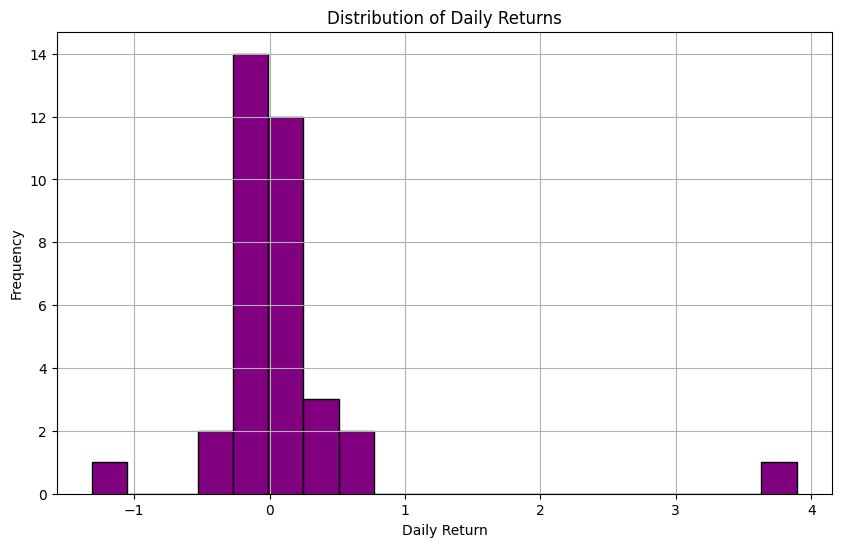

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(portfolio_df['returns'], bins=20, edgecolor='black', color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


PROTECTIVE COLLAR